<div>
    <img src="images/emlyon.png" style="height:60px; float:left; padding-right:10px; margin-top:5px" />
    <span>
        <h1 style="padding-bottom:5px;"> Introduction to Deep Learning </h1>
        <a href="https://masters.em-lyon.com/fr/msc-in-data-science-artificial-intelligence-strategy">[DSAIS]</a> MSc in Data Science & Artificial Intelligence Strategy <br/>
         Paris | © Saeed VARASTEH
    </span>
</div>

<div class="alert-info" style="border-bottom: solid 1px lightgray; background-color:#ece4f5;">
    <img src="images/assignment.png" style="height:60px; float:left; padding-right:10px;" />
    <span style="font-weight:bold; color:#8966b0">
        <h4 style="padding-top:25px;"> FINAL PROJECT </h4>
    </span>
</div>

###  DSAIS Face Recognition Application


In this project, you'll build a facial recognition system to recognize all of your friends.

Face recognition problems generally fall into one of two categories:

- __Face verification__, where you build a model to distinguish your face from others. This is a binary classification problem.
- __Face Recognition__, where you build a model to identify multiple faces. This is a multi-class classification problem.

Imagine a system for the Emlyon building where we want to provide face recognition to allow students to enter the building.

The goal is to fine-tune the classification head of __FaceNet__ to classify all your friends.

The project consists of two phases. 

- __Face Detection:__ In the first phase, you will need to prepare your datasets; you will use the __MTCNN__ model to create cropped face images from your raw images and store them in new directories.

- __Face Recognition:__ The second phase is very similar to what we did with transfer learning. You modify the classifier head of __FaceNet__ and train it on the cropped face images.

You will find FaceNet documentation here: [FaceNet](https://github.com/timesler/facenet-pytorch)

Finally, you can use your trained model to test it on test data.

__Extra step (high bounce!)__:

Build a Python application that shows recognized faces of DSAIS students on video feeds (or real-time images from the camera). 

---

### Getting face samples

For this project, you will need eleven photos of yourself and each of your friends on which to base your facial recognition application. 

You will have to work together to get them. 

__The sooner you take your photos and share them with others, the easier it will be for everyone to start working on the project.__

Let us say the deadline for uploading your pictures is <span style="color:crimson">Sunday, February 25, 23:59.</span>

Once you have your photos, post them [here](https://drive.google.com/drive/folders/1O8InPDGGy1eK7qjT92rL0DU9nd16lbo8?usp=sharing) under your name:

#### Names

#### Set Name

#### OpenCV Library

Install the opencv library if you do not have it. It is needed to access the camera on your machine.

In [ ]:
#!pip install opencv-python

#### Get Samples

The following code will allow you to access your system camera.

Once you have the feeds. Press "__s__" to save a new picture of your face.

You will need to do this 11 times.

When you are done, press "__q__" to close the camera window.

----

# Phase 00: Data preparation

- Renaming images to number+file_extension

- Split to train and test folder

In [1]:
import numpy as np
import pandas as pd

import os
import shutil

print(os.getcwd())

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\romai\January\Deep learning\Final Project


## Renaming the picture files

## Creating test and train samples

# Phase 01: Face detection

Face Detection: In the first phase, you will need to prepare your datasets; you will use the MTCNN model to create cropped face images from your raw images and store them in new directories.

In [ ]:
#!pip install facenet-pytorch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

np.random.seed(72)
torch.manual_seed(72)

import os
import shutil

import cv2
from PIL import Image
from IPython.display import display
from facenet_pytorch import MTCNN, InceptionResnetV1

print(os.getcwd())

C:\Users\romai\January\Deep learning\Final Project


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

(640, 360)


torch.Size([3, 160, 160])

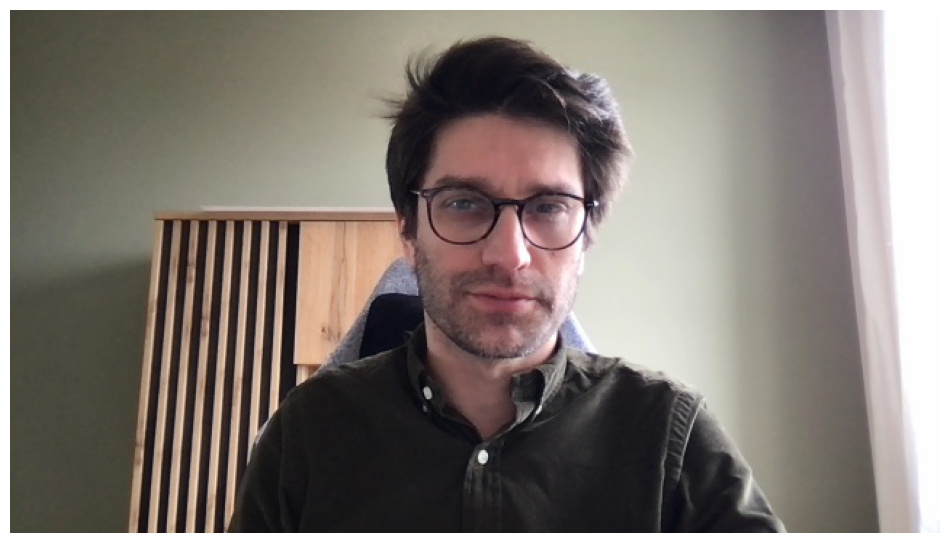

In [4]:
# Create face detector
mtcnn = MTCNN(select_largest=False, device='cuda')

# Load a single image and display
frame = Image.open(r'.\train\Saeed\00.jpg')
print(frame.size)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

(160, 160, 3)


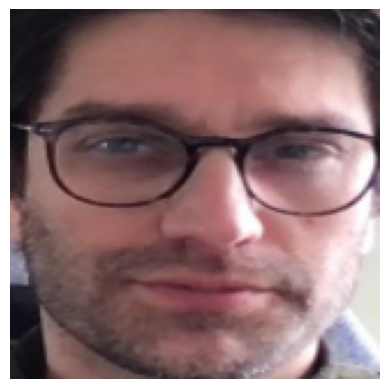

In [5]:
# Create face detector
mtcnn = MTCNN(margin=0, select_largest=False, post_process=False, device='cuda:0')

# Detect face
frame = Image.open(r'.\train\Saeed\00.jpg')

face = mtcnn(frame)

numpy_face = face.permute(1, 2, 0).int().numpy()
print(numpy_face.shape)

# Visualize
plt.imshow(numpy_face)
plt.axis('off');

In [6]:
# Getting a fresh dictionnary of the images in each folder

def listing_images(folder_path, images = False, name=""):
    
    # List all files and folders in the current working directory
    files_and_folders = os.listdir(folder_path)
    
    return files_and_folders

# Call the function to list files and folders
student_folder_list = listing_images(os.path.join(os.getcwd(), "train"), images = False)

# Call the function to 
train_images_dict = {}
for f in student_folder_list:
    #print(f)
    student_pictures_list = listing_images(os.path.join(os.getcwd(), "train", f)
                                                        , images = True, name=f)
    train_images_dict[f]=student_pictures_list

print(train_images_dict)

{'Ahmed': ['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg'], 'Alexandre': ['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg'], 'AswinSri': ['00.jpg', '01.jpg', '02.jpg', '03.JPG', '04.JPG', '05.jpg', '06.JPG', '07.jpg', '08.jpg'], 'Ata': ['00.jpg', '01.jpeg', '02.jpg', '03.jpeg', '04.jpeg', '05.jpeg', '06.jpeg', '07.jpeg', '08.jpeg'], 'Benjamin': ['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpeg', '06.jpg', '07.jpg', '08.jpg'], 'Braxton': ['00.jpeg', '01.jpeg', '02.jpeg', '03.jpeg', '04.jpeg', '05.jpeg', '06.jpeg', '07.jpeg', '08.jpeg'], 'Chadi': ['00.JPG', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg'], 'Charlie': ['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg'], 'Eze': ['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg'], 'Fulin': ['00.jpg', '01.jpg', '02.jpg', '03.jpg', '04.jpg', '05

In [ ]:
"""
## debugging the .HEIC loading problem with MTCNN

#!pip install pillow-heif
from PIL import Image
from pillow_heif import register_heif_opener

register_heif_opener()

image = Image.open(r'.\train\\HoangMinhThu\00.HEIC')

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
"""

In [7]:
## debugging the problem with this picture : I think it's because "color depth = 32" instead of 24 in the file property

from PIL import Image

im = Image.open(r'.\train\Maria\01.JPG')
rgb_im = im.convert('RGB')
rgb_im.save(r'.\train\Maria\01.JPG')

In [8]:
## debugging the problem with this picture : 

from PIL import Image

im = Image.open(r'.\samples\Namrata\06.jpg')
rgb_im = im.convert('RGB')
rgb_im.save(r'.\samples\Namrata\06.jpg')

frame.size
(1170, 1562)


torch.Size([3, 160, 160])

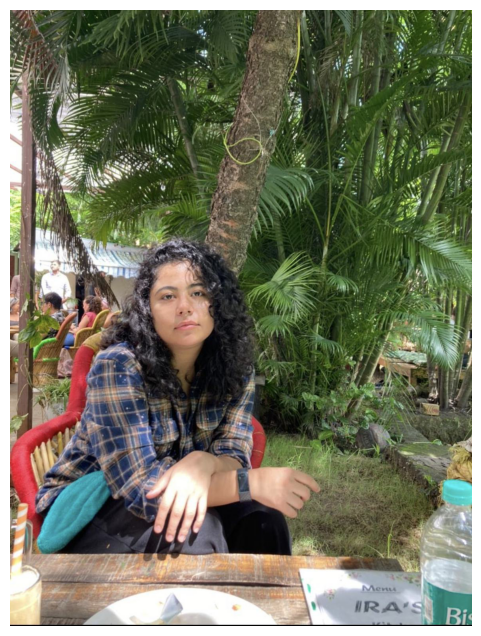

In [9]:
## debugging the problem with this picture :

# Create face detector
mtcnn = MTCNN(select_largest=False, device='cuda')

# Load a single image and display
frame = Image.open(r'.\samples\Namrata\06.jpg')
print("frame.size")
print(frame.size)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

In [ ]:
# Create face detector
mtcnn = MTCNN(margin=0, select_largest=False, post_process=False, device='cuda:0')

# Single image > cropping the pictures one by one
cropped_faces_dict={}

for student, pictures in train_images_dict.items():
    os.makedirs(os.path.join(os.getcwd(), "train_cropped", student), exist_ok=True)
    save_paths = [os.path.join(os.getcwd(), "train_cropped", student, picture) for picture in pictures]
    #print(save_paths)
    frames = [Image.open(os.path.join(os.getcwd(), "train", student, picture)) for picture in pictures]
    
    cropped_faces_dict[student]=save_paths
    
    for frame, save_path in zip(frames, save_paths):
        print(save_path)
        mtcnn(frame, save_path=save_path)

print("success")

In [10]:

# Call the function to list files and folders
student_folder_list = listing_images(os.path.join(os.getcwd(), "train_cropped"), images = False)

# Call the function to 
cropped_faces_dict = {}
for f in student_folder_list:
    #print(f)
    student_pictures_list = listing_images(os.path.join(os.getcwd(), "train_cropped", f)
                                                        , images = True, name=f)
    student_pictures_list = [os.path.join(os.getcwd(), "train_cropped", f, picture) for picture in student_pictures_list]
    cropped_faces_dict[f]=student_pictures_list

cropped_faces_dict

{'Ahmed': ['C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\00.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\01.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\02.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\03.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\04.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\05.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\06.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\07.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Ahmed\\08.jpg'],
 'Alexandre': ['C:\\Users\\romai\\January\\Deep learning\\Final Project\\train_cropped\\Alexandre\\00.jpg',
  'C:\\Users\\romai\\January\\Deep learning\\Final Project\\tra

C:\Users\romai\AppData\Local\Temp\ipykernel_20204\2274982343.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


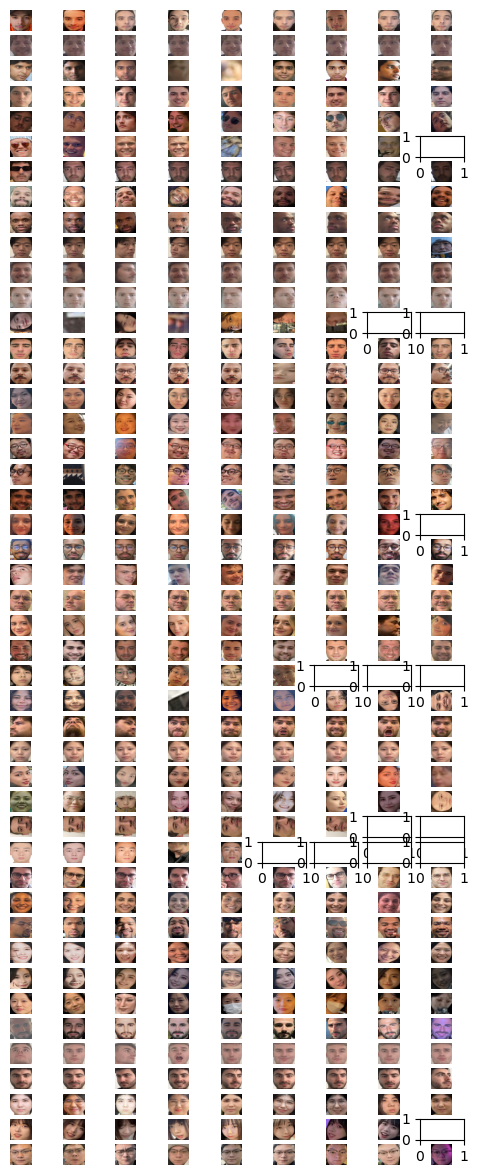

In [11]:

            
fig, axes = plt.subplots(len(cropped_faces_dict.keys()),
                         len(max(cropped_faces_dict.values(), key=len)),
                         figsize=(6, 15))

for i, (names, frame_faces) in enumerate(cropped_faces_dict.items()):
    for j, face in enumerate(frame_faces):
        face=frame = Image.open(face)
        axes[i, j].imshow(face)
        axes[i, j].axis('off')
fig.show()

C:\Users\romai\AppData\Local\Temp\ipykernel_20204\2256623033.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


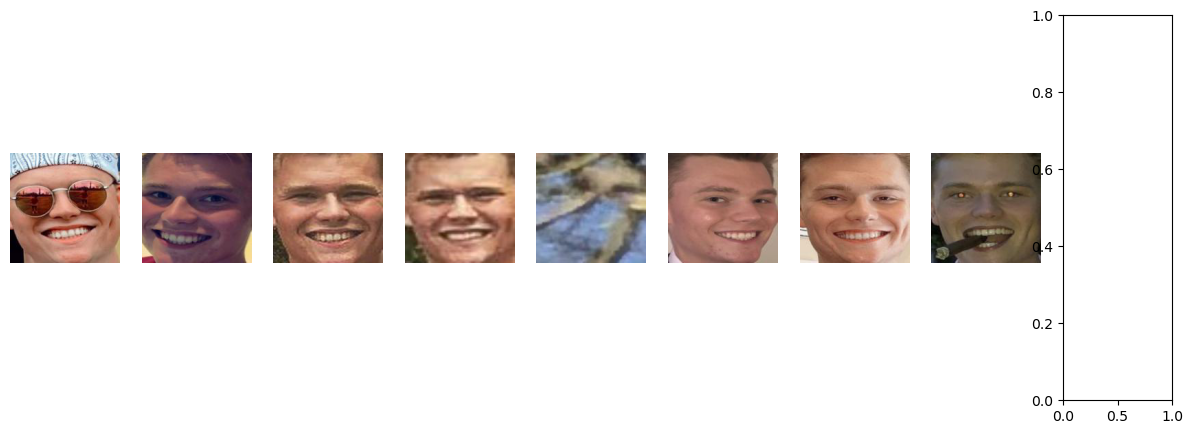

In [12]:
    
fig, axes = plt.subplots(1,
                         len(max(cropped_faces_dict.values(), key=len)),
                         figsize=(15, 5))

for i, (names, frame_faces) in enumerate(cropped_faces_dict.items()):
    if names=="Braxton":
        for j, face in enumerate(frame_faces):
            face=frame = Image.open(face)
            axes[ j].imshow(face)
            axes[ j].axis('off')
fig.show()

# Phase 02: Face recognition 

Face Recognition, where you build a model to identify multiple faces. This is a multi-class classification problem.

Face Recognition: The second phase is very similar to what we did with transfer learning. You modify the classifier head of FaceNet and train it on the cropped face images.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

np.random.seed(72)
torch.manual_seed(72)

import os
import shutil

import cv2
from PIL import Image
from pillow_heif import register_heif_opener
register_heif_opener()

from IPython.display import display
from facenet_pytorch import MTCNN, InceptionResnetV1

print(os.getcwd())

C:\Users\romai\January\Deep learning\Final Project


In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Dataset

In [ ]:
# Create face detector
#mtcnn = MTCNN(margin=0, select_largest=False, post_process=False, device=device)

In [18]:
from torchvision import transforms
from facenet_pytorch import fixed_image_standardization

train_transform = transforms.Compose([
    transforms.PILToTensor(),
    #fixed_image_standardization
])

from torchvision import datasets

train_dataset = datasets.ImageFolder(root=os.path.join(os.getcwd(), r"./train_cropped"),
                                     transform=train_transform)  #, transform=mtcnn) # we could have used that if the images where same size and type

len(train_dataset)

400

In [19]:
categories = train_dataset.class_to_idx
print(len(categories))
categories

46


{'Ahmed': 0,
 'Alexandre': 1,
 'AswinSri': 2,
 'Ata': 3,
 'Benjamin': 4,
 'Braxton': 5,
 'Chadi': 6,
 'Charlie': 7,
 'Eze': 8,
 'Fulin': 9,
 'Gabriel': 10,
 'Gautier': 11,
 'HoangMinhThu': 12,
 'Jad': 13,
 'JeanLuis': 14,
 'JiaXin': 15,
 'Jing': 16,
 'JiyuanPeter': 17,
 'KingMan': 18,
 'Manuel': 19,
 'Maria': 20,
 'Marouane': 21,
 'Martino': 22,
 'Mathieu': 23,
 'Michelle': 24,
 'Mohamed': 25,
 'Muyun': 26,
 'Namrata': 27,
 'Nicholas': 28,
 'Peiwen': 29,
 'Qinyi': 30,
 'Qiqi': 31,
 'Romain': 32,
 'Ruicong': 33,
 'Saeed': 34,
 'Selin': 35,
 'Selle': 36,
 'Shiqing': 37,
 'Shiyao': 38,
 'SongRim': 39,
 'Thomas': 40,
 'Tristan': 41,
 'Valentin': 42,
 'Wujiachen': 43,
 'Xinyue': 44,
 'Yuekai': 45}

In [20]:
import pickle 

with open('saved_dictionary.pkl', 'wb') as f:
    pickle.dump(categories, f)


In [21]:
img, lbl = train_dataset[0]
img.shape, lbl

(torch.Size([3, 160, 160]), 0)

In [22]:
img, lbl = train_dataset[45]
img.shape, lbl

(torch.Size([3, 160, 160]), 5)

In [23]:
type(img), type(lbl)

(torch.Tensor, int)

In [24]:
img

tensor([[[177, 146, 180,  ..., 105,  89, 104],
         [166, 153, 177,  ..., 112,  98,  90],
         [159, 167, 178,  ...,  94,  97,  87],
         ...,
         [  6,   6,   6,  ..., 187, 189, 192],
         [  6,   6,   6,  ..., 187, 187, 189],
         [  6,   6,   6,  ..., 186, 187, 188]],

        [[212, 181, 213,  ..., 104,  91, 107],
         [201, 188, 210,  ..., 112, 101,  95],
         [194, 200, 211,  ...,  96, 103,  95],
         ...,
         [  1,   1,   1,  ..., 148, 155, 158],
         [  1,   1,   1,  ..., 148, 153, 155],
         [  1,   1,   1,  ..., 147, 151, 154]],

        [[231, 200, 232,  ..., 112, 104, 124],
         [220, 207, 229,  ..., 122, 116, 114],
         [213, 219, 230,  ..., 108, 119, 114],
         ...,
         [  8,   8,   8,  ..., 115, 118, 121],
         [  8,   8,   8,  ..., 115, 118, 118],
         [  8,   8,   8,  ..., 116, 117, 117]]], dtype=torch.uint8)

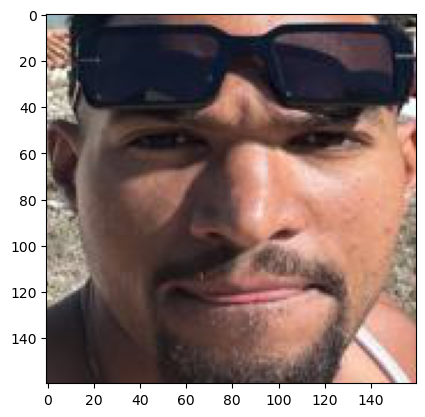

In [25]:
# checking .HEIC pictures

img, lbl = train_dataset[315]

plt.imshow(img.permute(1,2,0).int().numpy())

# if img is PIL Image -> display(img)
# if img is a tensor -> plt.imshow()
# plt imshow expects the inputs of size h*w*c

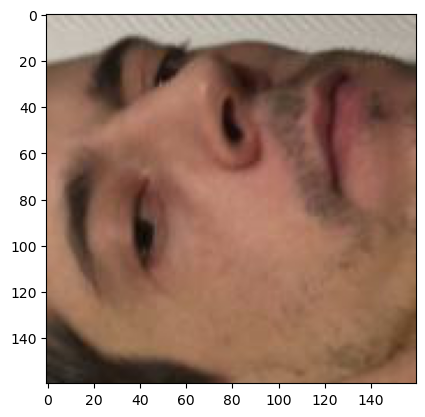

In [26]:
# checking my pictures

img, lbl = train_dataset[285]

plt.imshow(img.permute(1,2,0).int().numpy())

# if img is PIL Image -> display(img)
# if img is a tensor -> plt.imshow()
# plt imshow expects the inputs of size h*w*c

0
tensor([[[ 45,  46,  45,  ...,  51,  51,  51],
         [ 43,  43,  42,  ...,  49,  50,  50],
         [ 43,  41,  40,  ...,  45,  47,  48],
         ...,
         [235, 231, 227,  ..., 207, 204, 201],
         [235, 232, 229,  ..., 209, 205, 201],
         [233, 230, 228,  ..., 210, 205, 200]],

        [[ 43,  44,  43,  ...,  38,  38,  38],
         [ 41,  41,  40,  ...,  36,  37,  37],
         [ 41,  39,  38,  ...,  32,  34,  35],
         ...,
         [ 84,  80,  76,  ...,  52,  49,  46],
         [ 81,  79,  76,  ...,  53,  49,  44],
         [ 80,  77,  75,  ...,  54,  49,  43]],

        [[ 44,  45,  44,  ...,  30,  30,  30],
         [ 42,  42,  41,  ...,  28,  29,  29],
         [ 44,  42,  41,  ...,  24,  26,  27],
         ...,
         [ 31,  27,  21,  ...,   4,   3,   0],
         [ 27,  22,  19,  ...,   5,   1,   0],
         [ 23,  19,  17,  ...,   6,   1,   0]]], dtype=torch.uint8)
0
1
tensor([[[197, 188, 182,  ...,  66,  67,  65],
         [194, 189, 184,  ...,  65

74
tensor([[[ 21,  19,  16,  ...,  23,  24,  25],
         [ 19,  20,  18,  ...,  26,  27,  36],
         [ 17,  19,  18,  ...,  27,  23,  36],
         ...,
         [204, 204, 203,  ...,  69,  66,  61],
         [203, 203, 203,  ...,  60,  60,  63],
         [203, 203, 202,  ...,  56,  57,  62]],

        [[ 20,  18,  16,  ...,  27,  32,  34],
         [ 18,  19,  18,  ...,  30,  32,  44],
         [ 16,  18,  17,  ...,  27,  27,  41],
         ...,
         [206, 206, 205,  ...,  70,  68,  63],
         [205, 205, 205,  ...,  62,  62,  63],
         [205, 205, 204,  ...,  58,  57,  63]],

        [[ 16,  14,  14,  ...,  30,  35,  39],
         [ 14,  15,  16,  ...,  31,  36,  47],
         [ 12,  14,  15,  ...,  27,  30,  44],
         ...,
         [203, 203, 202,  ...,  72,  67,  62],
         [202, 202, 202,  ...,  61,  59,  61],
         [202, 202, 201,  ...,  57,  55,  58]]], dtype=torch.uint8)
8
75
tensor([[[ 39,  39,  39,  ...,  69,  81,  91],
         [ 36,  36,  37,  ...,  

tensor([[[ 10,   9,   8,  ..., 215, 214, 214],
         [  9,   8,   7,  ..., 215, 214, 214],
         [  7,   7,   6,  ..., 215, 214, 214],
         ...,
         [115, 114, 112,  ...,  35,  37,  38],
         [112, 110, 106,  ...,  36,  38,  41],
         [108, 105,  99,  ...,  37,  40,  41]],

        [[  8,   7,   8,  ..., 227, 226, 226],
         [  7,   8,   7,  ..., 227, 226, 226],
         [  7,   7,   6,  ..., 227, 226, 226],
         ...,
         [115, 114, 112,  ...,  37,  39,  40],
         [112, 110, 106,  ...,  38,  40,  41],
         [108, 105,  99,  ...,  39,  40,  41]],

        [[  9,   8,  10,  ..., 227, 226, 226],
         [  8,  10,   9,  ..., 227, 226, 226],
         [  9,   9,   8,  ..., 227, 226, 226],
         ...,
         [115, 114, 112,  ...,  49,  51,  52],
         [112, 110, 106,  ...,  50,  52,  53],
         [108, 105,  99,  ...,  51,  52,  53]]], dtype=torch.uint8)
17
151
tensor([[[ 43,  37,  31,  ...,  47,  47,  49],
         [ 40,  39,  38,  ...,  3

226
tensor([[[ 71,  71,  73,  ...,  49,  58,  68],
         [ 71,  71,  73,  ...,  54,  62,  71],
         [ 58,  59,  60,  ...,  62,  68,  72],
         ...,
         [232, 235, 239,  ..., 188, 188, 189],
         [232, 231, 236,  ..., 188, 189, 189],
         [231, 229, 233,  ..., 189, 189, 189]],

        [[ 68,  68,  68,  ...,  40,  51,  61],
         [ 68,  68,  68,  ...,  45,  55,  64],
         [ 55,  56,  55,  ...,  53,  59,  65],
         ...,
         [232, 233, 235,  ..., 188, 188, 189],
         [232, 229, 232,  ..., 188, 189, 189],
         [231, 227, 229,  ..., 189, 189, 189]],

        [[ 63,  63,  62,  ...,  31,  43,  53],
         [ 63,  63,  62,  ...,  36,  47,  56],
         [ 50,  51,  49,  ...,  44,  50,  57],
         ...,
         [232, 234, 234,  ..., 186, 186, 187],
         [232, 230, 231,  ..., 186, 187, 187],
         [231, 228, 228,  ..., 187, 187, 187]]], dtype=torch.uint8)
25
227
tensor([[[ 49,  48,  47,  ...,  40,  43,  43],
         [ 51,  50,  48,  ...

tensor([[[ 90,  77,  62,  ...,  43,  36,  36],
         [ 93,  76,  60,  ...,  58,  49,  41],
         [ 80,  94, 104,  ...,  68,  59,  49],
         ...,
         [237, 236, 235,  ...,  39,  39,  39],
         [238, 237, 235,  ...,  40,  40,  40],
         [240, 239, 236,  ...,  40,  40,  40]],

        [[ 69,  56,  41,  ...,  18,  11,  11],
         [ 72,  55,  39,  ...,  35,  24,  16],
         [ 59,  73,  83,  ...,  45,  37,  27],
         ...,
         [206, 205, 204,  ...,  40,  40,  40],
         [207, 206, 204,  ...,  41,  41,  41],
         [209, 208, 205,  ...,  41,  41,  41]],

        [[ 50,  37,  22,  ...,  13,   4,   4],
         [ 53,  36,  20,  ...,  29,  17,   9],
         [ 40,  54,  64,  ...,  37,  26,  16],
         ...,
         [177, 176, 173,  ...,  32,  32,  32],
         [178, 177, 173,  ...,  35,  35,  35],
         [180, 179, 174,  ...,  35,  35,  35]]], dtype=torch.uint8)
34
301
tensor([[[ 72,  67,  60,  ...,  31,  29,  31],
         [ 64,  61,  55,  ...,  2

tensor([[[238, 235, 231,  ...,  73,  89, 103],
         [236, 231, 230,  ...,  55,  65,  75],
         [229, 226, 229,  ...,  52,  54,  61],
         ...,
         [238, 238, 238,  ..., 237, 237, 237],
         [237, 237, 237,  ..., 237, 237, 236],
         [236, 236, 236,  ..., 237, 237, 236]],

        [[230, 227, 223,  ...,  63,  79,  93],
         [228, 223, 222,  ...,  45,  55,  65],
         [221, 218, 221,  ...,  42,  44,  51],
         ...,
         [235, 235, 235,  ..., 230, 230, 229],
         [234, 234, 234,  ..., 230, 229, 228],
         [233, 233, 233,  ..., 230, 229, 228]],

        [[219, 216, 212,  ...,  61,  77,  91],
         [217, 212, 211,  ...,  43,  53,  63],
         [210, 207, 210,  ...,  40,  42,  49],
         ...,
         [228, 228, 228,  ..., 224, 224, 226],
         [227, 227, 227,  ..., 224, 226, 225],
         [226, 226, 226,  ..., 224, 226, 225]]], dtype=torch.uint8)
42
369
tensor([[[ 33,  33,  33,  ...,  77,  71,  59],
         [ 33,  33,  32,  ...,  9

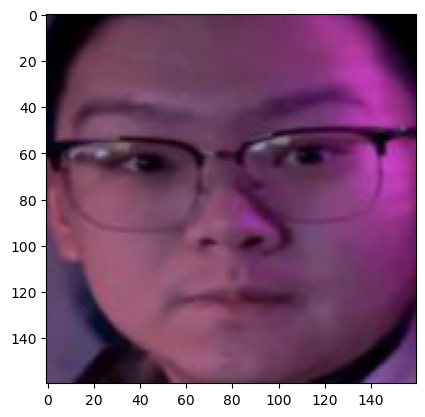

In [27]:
# testing that they all works (= no error)
# before I had None types by using MTCNN in the transform parameter of datasets.ImageFolder(
# train_dataset = datasets.ImageFolder(root=os.path.join(os.getcwd(), "samples_cropped"), transform=mtcnn)

for i in range(len(train_dataset)):
    print(i)
    img, lbl = train_dataset[i]
    print(img)
    print(lbl)

    plt.imshow(img.permute(1,2,0).int().numpy())

### Train/Validation Split

In [28]:
train_dataset, val_dataset = random_split(train_dataset, [320, 80])

len(train_dataset), len(val_dataset)

(320, 80)

### DataLoaders

In [29]:
# your code
train_loader = DataLoader(dataset=train_dataset, batch_size=32)
val_loader = DataLoader(dataset=val_dataset, batch_size=16)

len(train_loader), len(val_loader)

(10, 5)

In [30]:
# Let's check the input, output dimensions:
img, label = next(iter(train_loader))
img.shape, label.shape

(torch.Size([32, 3, 160, 160]), torch.Size([32]))

In [31]:
# Let's check the input, output dimensions:
img, label = next(iter(val_loader))
img.shape, label.shape

(torch.Size([16, 3, 160, 160]), torch.Size([16]))

### Building a Model

Face Recognition: The second phase is very similar to what we did with transfer learning. You modify the classifier head of FaceNet and train it on the cropped face images.

In [32]:
from facenet_pytorch import MTCNN, InceptionResnetV1

# Create an inception resnet (in eval mode):
resnet = InceptionResnetV1(pretrained='vggface2', classify=True).eval()

In [33]:
list(resnet.children())

[BasicConv2d(
   (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
   (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU()
 ),
 BasicConv2d(
   (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
   (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU()
 ),
 BasicConv2d(
   (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
   (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU()
 ),
 MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False),
 BasicConv2d(
   (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
   (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
   (relu): ReLU()
 ),
 BasicConv2d(
   (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
   (bn): BatchNorm2d(192, ep

In [34]:
list(resnet.children())[-1]

Linear(in_features=512, out_features=8631, bias=True)

In [35]:
base_ = list(resnet.children())[:-1]
resnet_base = nn.Sequential(*base_)

In [36]:
list(resnet.children())[14]

Dropout(p=0.6, inplace=False)

In [37]:
list(resnet.children())[15]

Linear(in_features=1792, out_features=512, bias=False)

In [38]:
list(resnet.children())[16]

BatchNorm1d(512, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)

In [39]:
len(categories)

46

In [40]:
class CohortClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        resnet = InceptionResnetV1(pretrained='vggface2', classify=True,
                                   num_classes=len(categories))
        entry_ = list(resnet.children())[:15]
        self.beginning = nn.Sequential(*entry_)
        self.reg = nn.Flatten()
        self.pb = list(resnet.children())[15]    # dimension problem within the pre-trained model
        base_ = list(resnet.children())[16:-1]
        self.features = nn.Sequential(*base_)
        self.fc = nn.Sequential(
                                nn.Flatten(), # temp for debug: 262144 (57344x1 and 1792x512)
                                nn.Linear(512, 500),
                                nn.Linear(500, len(categories))
                                )
        
    def forward(self, x):
        out = self.beginning(x)
        out = self.reg(out)
        out = self.pb(out)
        out = self.features(out)
        out = self.fc(out)
        return out

    
#device="cpu"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


tmpModel = CohortClassifier().to(device)
tmpBatch, _ = next(iter(train_loader))
print(tmpBatch.shape)
print(tmpBatch[0].shape)
tmpOutput = tmpModel(tmpBatch.float().to(device))
tmpOutput.shape


cuda
torch.Size([32, 3, 160, 160])
torch.Size([3, 160, 160])


torch.Size([32, 46])

### Model Training

In [41]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

"""

## this unfreeze the first pre tained layers so that the model will be able to learn and about to the new dataset

for params in model.features.parameters():
    #print(params.shape)
    params.requires_grad = False

print("done")
"""

'\n\n## this unfreeze the first pre tained layers so that the model will be able to learn and about to the new dataset\n\nfor params in model.features.parameters():\n    #print(params.shape)\n    params.requires_grad = False\n\nprint("done")\n'

In [42]:
# your code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

model = CohortClassifier().to(device)

train_losses = []; train_accs = []
validation_losses = []; validation_accs = []

lr = 0.01
n_epochs = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Training Loop
    model.train()
    train_loss, train_acc = 0, 0
    
    for x_batch, y_batch in train_loader: 
            
        x_batch = x_batch.float().to(device)
        y_batch = y_batch.to(device)
        
        y_logits = model(x_batch)
        loss = loss_fn(y_logits, y_batch)
        
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()    
        optimizer.step()
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # turn logits -> pred probs -> pred labels
        train_acc += accuracy_fn(y_true=y_batch, y_pred=y_pred) 
        
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    
    train_acc /= len(train_loader)
    train_accs.append(train_acc)
    
    # Validation Loop
    model.eval()
    validation_loss , validation_acc = 0, 0
    
    with torch.no_grad():
        for x_val, y_val in val_loader:

            x_val = x_val.float().to(device)
            y_val = y_val.to(device)

            y_logits = model(x_val)
            val_loss = loss_fn(y_logits, y_val)
            
            validation_loss += val_loss.item()
            
            y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
            validation_acc += accuracy_fn(y_true=y_val, y_pred=y_pred) 
        
    validation_loss /= len(val_loader)
    validation_losses.append(validation_loss)
    
    validation_acc /= len(val_loader)
    validation_accs.append(validation_acc)
    
    # Print out what's happening every 10 epochs
    if epoch % 1 == 0:
        print(f"Epoch: {epoch} | Loss: {train_loss:.5f}, Accuracy: {train_acc:.2f}% | val loss: {validation_loss:.5f}, val acc: {validation_acc:.2f}%")


cuda
Epoch: 0 | Loss: 3.60049, Accuracy: 11.56% | val loss: 3.26612, val acc: 35.00%
Epoch: 1 | Loss: 2.84594, Accuracy: 72.81% | val loss: 2.73843, val acc: 76.25%
Epoch: 2 | Loss: 2.20645, Accuracy: 95.00% | val loss: 2.29750, val acc: 86.25%
Epoch: 3 | Loss: 1.68666, Accuracy: 97.50% | val loss: 1.94514, val acc: 88.75%
Epoch: 4 | Loss: 1.27536, Accuracy: 98.12% | val loss: 1.65810, val acc: 91.25%
Epoch: 5 | Loss: 0.96082, Accuracy: 99.06% | val loss: 1.42407, val acc: 93.75%
Epoch: 6 | Loss: 0.72592, Accuracy: 99.38% | val loss: 1.24576, val acc: 93.75%
Epoch: 7 | Loss: 0.55691, Accuracy: 99.69% | val loss: 1.08944, val acc: 95.00%
Epoch: 8 | Loss: 0.43184, Accuracy: 100.00% | val loss: 0.97471, val acc: 95.00%
Epoch: 9 | Loss: 0.34094, Accuracy: 100.00% | val loss: 0.88592, val acc: 96.25%
Epoch: 10 | Loss: 0.27998, Accuracy: 100.00% | val loss: 0.81505, val acc: 96.25%
Epoch: 11 | Loss: 0.23383, Accuracy: 100.00% | val loss: 0.75488, val acc: 96.25%
Epoch: 12 | Loss: 0.19768, Ac

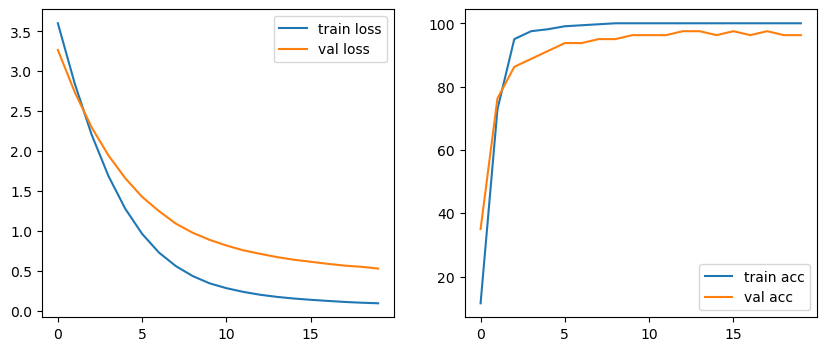

In [43]:
# Learning curves:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].plot(train_losses,  label="train loss"); 
ax[0].plot(validation_losses,  label="val loss"); 
ax[0].legend();

ax[1].plot(train_accs,  label="train acc");
ax[1].plot(validation_accs,  label="val acc"); 
ax[1].legend();

### Making Predications

When you are done training your model, simply run the following code. It will save your model as a file named model.pt. Send it to me to test it on the test data,

In [44]:
from torchvision import transforms
from facenet_pytorch import fixed_image_standardization

test_transform = transforms.Compose([
    transforms.Resize((160,160)),
    transforms.PILToTensor(),
    #fixed_image_standardization
])

from torchvision import datasets

test_dataset = datasets.ImageFolder(root=os.path.join(os.getcwd(), r"./test_cropped"),
                                     transform=test_transform)  #, transform=mtcnn)

len(test_dataset)

90

In [45]:
categories_test = test_dataset.class_to_idx
print(len(categories_test))
categories_test

46


{'Ahmed': 0,
 'Alexandre': 1,
 'AswinSri': 2,
 'Ata': 3,
 'Benjamin': 4,
 'Braxton': 5,
 'Chadi': 6,
 'Charlie': 7,
 'Eze': 8,
 'Fulin': 9,
 'Gabriel': 10,
 'Gautier': 11,
 'HoangMinhThu': 12,
 'Jad': 13,
 'JeanLuis': 14,
 'JiaXin': 15,
 'Jing': 16,
 'JiyuanPeter': 17,
 'KingMan': 18,
 'Manuel': 19,
 'Maria': 20,
 'Marouane': 21,
 'Martino': 22,
 'Mathieu': 23,
 'Michelle': 24,
 'Mohamed': 25,
 'Muyun': 26,
 'Namrata': 27,
 'Nicholas': 28,
 'Peiwen': 29,
 'Qinyi': 30,
 'Qiqi': 31,
 'Romain': 32,
 'Ruicong': 33,
 'Saeed': 34,
 'Selin': 35,
 'Selle': 36,
 'Shiqing': 37,
 'Shiyao': 38,
 'SongRim': 39,
 'Thomas': 40,
 'Tristan': 41,
 'Valentin': 42,
 'Wujiachen': 43,
 'Xinyue': 44,
 'Yuekai': 45}

In [46]:
# checking that we have the same number of class for training and testing
categories_test==categories

True

In [47]:
# your code
test_loader = DataLoader(dataset=test_dataset, batch_size=16)

len(test_loader)

6

In [48]:
# Let's check the input, output dimensions:
img, label = next(iter(test_loader))
img.shape, label.shape

(torch.Size([16, 3, 160, 160]), torch.Size([16]))

In [49]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [50]:
# your code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
    
# Validation Loop
model.eval()
test_acc = 0

y_true=[]
y_preds=[]
    
with torch.no_grad():
    for x_test, y_test in test_loader:
        y_true.extend(y_test.to('cpu').numpy())

        x_test = x_test.float().to(device)
        y_test = y_test.to(device)

        y_logits = model(x_test)
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        y_preds.extend(y_pred.to('cpu').numpy())
        test_acc += accuracy_fn(y_true=y_test, y_pred=y_pred)
        print(test_acc)

test_acc /= len(test_loader)


# Print out what's happening every 10 epochs
print(f"Test Accuracy: {test_acc:.2f}%")


cuda
87.5
175.0
268.75
362.5
462.5
552.5
Test Accuracy: 92.08%


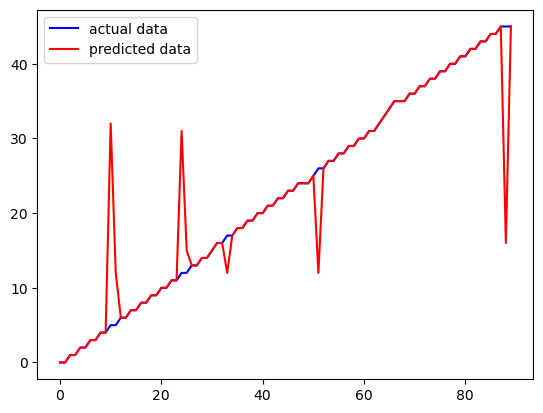

In [51]:
plt.plot(y_true, c="b", label="actual data");
plt.plot(y_preds, c="r", label="predicted data");
plt.legend()

C:\Users\romai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\romai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\romai\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       0.50      1.00      0.67         1
          16       0.67      1.00      0.80         2
          17       1.00    

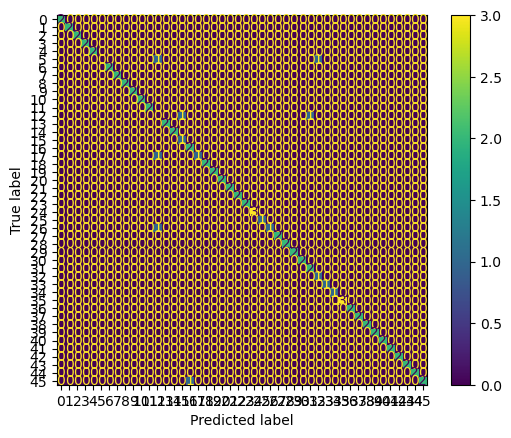

In [52]:
# your code
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true, y_preds)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_true, y_preds))

## Saving the model

In [53]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%Y-%m-%d_%Hh%M")
print("date and time =", dt_string)

now = 2024-03-10 22:35:40.194112
date and time = 2024-03-10_22h35


In [54]:
# DO NOT CHANGE
img, _ = next(iter(val_loader))
img = img.float().to(device)

with torch.no_grad():
    model_trace = torch.jit.trace(model, (img))

torch.jit.save(model_trace,"face_reco_romain_"+dt_string+".pt")

## Loading the model

In [55]:
import torch
import io

model_loaded = torch.jit.load('face_reco_romain_2024-03-09_14h59.pt')

In [56]:
# your code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
    
# Validation Loop
model_loaded.eval()
test_acc = 0

y_true=[]
y_preds=[]
    
with torch.no_grad():
    for x_test, y_test in test_loader:
        y_true.extend(y_test.to('cpu').numpy())

        x_test = x_test.float().to(device)
        y_test = y_test.to(device)

        y_logits = model_loaded(x_test)
        
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        y_preds.extend(y_pred.to('cpu').numpy())
        test_acc += accuracy_fn(y_true=y_test, y_pred=y_pred)
        print(test_acc)

test_acc /= len(test_loader)


# Print out what's happening every 10 epochs
print(f"Test Accuracy: {test_acc:.2f}%")


cuda
87.5
175.0
268.75
362.5
462.5
552.5
Test Accuracy: 92.08%


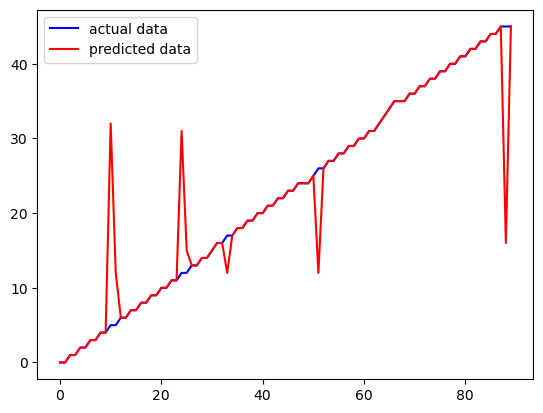

In [57]:
plt.plot(y_true, c="b", label="actual data");
plt.plot(y_preds, c="r", label="predicted data");
plt.legend()

## Test with a new image

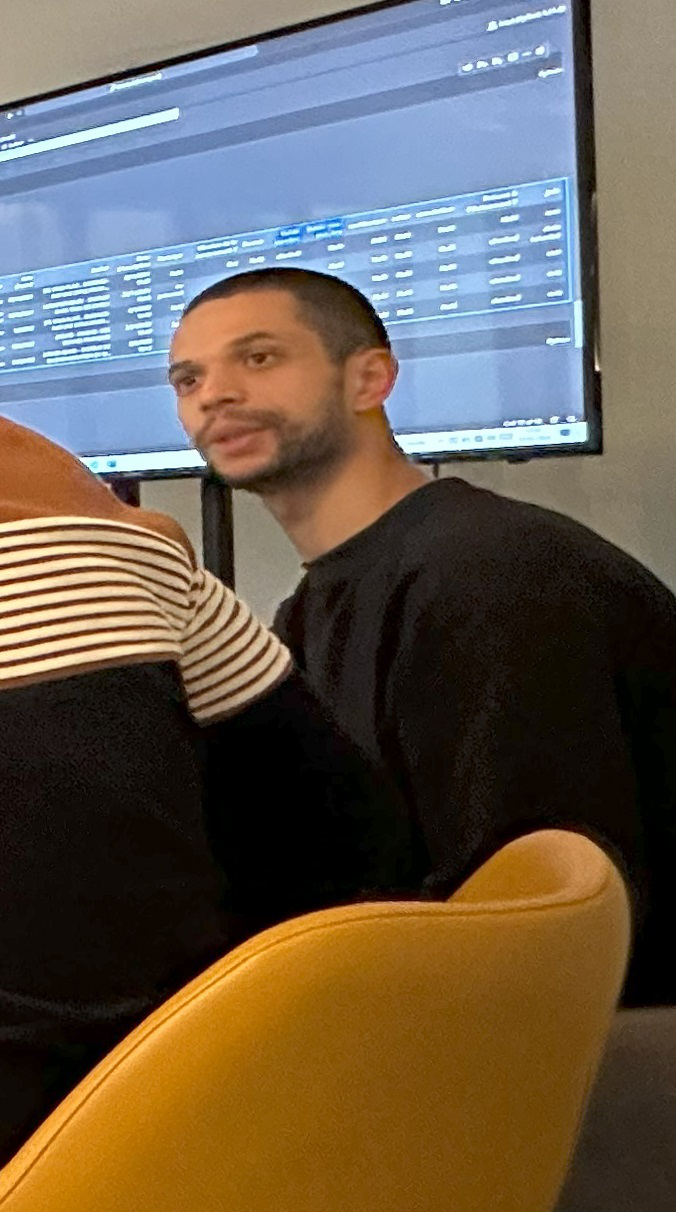

In [8]:
# Test model with an input Image
img_test = Image.open("./IMG_7057.jpg")
img_test

In [59]:
# Create face detector
mtcnn = MTCNN(margin=0, select_largest=False, post_process=False, device='cuda:0')

mtcnn(img_test, save_path="./cropped_IMG_7057.jpg")

print("success")

success


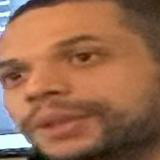

In [60]:
img_test = Image.open("./cropped_IMG_7057.jpg")
img_test

In [61]:
# Convert it to tensor
img_test_tensor = test_transform(img_test)
img_test_tensor.shape # b*c*c*h*w

torch.Size([3, 160, 160])

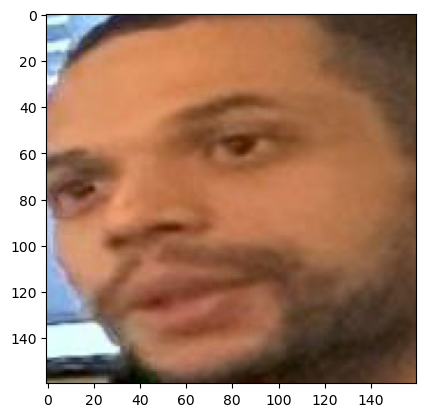

In [62]:
plt.imshow(img_test_tensor.permute(1,2,0).int().numpy())

In [63]:
img_test_tensor = img_test_tensor.unsqueeze(0)

In [64]:
y_logits = model(img_test_tensor.float().to(device))
y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

In [65]:
y_pred

tensor([7], device='cuda:0')

In [66]:
len(y_pred)

1

In [67]:
for k,v in categories.items():
    if v==y_pred.detach():
        print(k,v)
        print("Charlie", categories['Charlie'])

Charlie 7
Charlie 7


---

# Phase 03: Extra step (high bounce!):

Build a Python application that shows recognized faces of DSAIS students on video feeds (or real-time images from the camera).

# This code is stand alone and does not need the above to be run

In [ ]:
#!pip install facenet-pytorch
#!pip install mmcv

In [1]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import cv2 #, mmcv
from PIL import Image, ImageDraw
from IPython import display

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

np.random.seed(72)
torch.manual_seed(72)

import os
import shutil

import cv2
from PIL import Image
from pillow_heif import register_heif_opener
register_heif_opener()

from IPython.display import display
from facenet_pytorch import MTCNN, InceptionResnetV1

print(os.getcwd())

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


C:\Users\romai\January\Deep learning\Final Project


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [4]:
import torch
import io

model_loaded = torch.jit.load('face_reco_romain_2024-03-09_14h59.pt')
model_loaded.eval().to(device)

import pickle 
        
with open('saved_dictionary.pkl', 'rb') as f:
    dict_name_idx= pickle.load(f)

In [5]:
from torchvision import transforms
from facenet_pytorch import fixed_image_standardization

test_transform = transforms.Compose([
    transforms.Resize((160,160)),
    transforms.PILToTensor(),
    #fixed_image_standardization
])

In [6]:
import cv2
import time

video_capture = cv2.VideoCapture(0)

mtcnn = MTCNN(keep_all=True, device=device)

flag=True

while flag==True:
    #if flag==True:
    try:
        _, frame = video_capture.read()
        scale_percent = 100
        dim = (int(frame.shape[1] * scale_percent / 100), int(frame.shape[0] * scale_percent / 100))
        frame = cv2.resize(frame, dim)

        key = cv2.waitKey(1) & 0xff

        # Detect faces
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        boxes, _ = mtcnn.detect(frame)

        for box in boxes:
            x, y, w, h = box
            cv2.rectangle(frame, (int(x), int(y)), (int(w), int(h)), (0, 255, 0), 2)
            face = frame[int(y):int(h), int(x):int(w)]
            face = Image.fromarray(face)
            face= test_transform(face)
            face = face.unsqueeze(0)

            with torch.no_grad():
                x_test = face.float().to(device)
                y_logits = model_loaded(x_test)
                y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

                probability = y_pred
                for k,v in dict_name_idx.items():
                    if v==y_pred:
                        predicted_name = k
                cv2.putText(frame, predicted_name, (int(x), int(y)-10),
                                cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2)

        cv2.imshow('Video Stream', frame)
    
    #else:
    except Exception as e:
        #print(e)
        continue
    
    if key == ord('q'):
        video_capture.release()
        flag=False
        continue

cv2.destroyAllWindows()
cv2.waitKey(1)
print("Done")


Done
